In [17]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv('couples.unique.csv')
df = df.set_index('Couple')
df = df[~pd.isnull(df['spvl'])]
og_df = df.copy()

## Options of how to treat the data

In [19]:
base_output_name = 'blanquart.couples.for.fitting'

file_suffix = ''
dose_column = 'spvl'
# remove undectable viral load?
remove_undectable = False
if remove_undectable:
    file_suffix += '.ur'
    dose_column = 'spvl.ur'

In [20]:
if remove_undectable:
    df = df[~pd.isna(df['spvl.ur'])]

## Processing data

In [21]:
df['partner.ever.seroconverted'] = (df['partner.firstPosDate'] != np.inf)
df['partner.ever.seroconverted'].sum()

229

In [22]:
# do this later with inferred seroconversion date?
df['partner.first.pos.after.art'] = df['partner.ever.seroconverted'] & (df['partner.firstPosDate'] > df['index.first.art.date'])
df['partner.first.pos.after.art'].sum()

17

In [23]:
df['partner.seroconverted.before.art'] = df['partner.ever.seroconverted'] & ~df['partner.first.pos.after.art']
df['partner.seroconverted.before.art'].sum()

212

In [24]:
df['index.inferred.spvl.start.date'] = df['index.firstPosDate'] + 0.5

In [25]:
# here we can choose to do midpoint or not!

df['partner.inferred.seroconversion.date'] = np.where(
    df['partner.ever.seroconverted'],
    (df['partner.firstPosDate'] + df['partner.lastNegDate'])/2,
    np.inf
)

In [26]:
df['infectious.contact.period.end'] = np.where(
    df['partner.seroconverted.before.art'],
    df[['index.first.art.date', 'partner.inferred.seroconversion.date']].min(axis=1),
    df[['index.first.art.date', 'partner.lastNegDate']].min(axis=1),
)

In [27]:
df['duration'] = df['infectious.contact.period.end'] - df['index.inferred.spvl.start.date']

In [28]:
df[df['duration'] <= 0].index

Index([  61,  219,  255,  279,  291,  316,  320,  392,  466,  514,  591,  629,
        685,  703,  705,  722,  737,  741,  781,  847,  859,  866,  882,  899,
        901,  921, 1207, 1219, 1343, 1362, 1416, 1430, 1458, 1486, 1640, 1758,
       1855, 1860, 1867, 1989, 2098, 2123, 2135, 2137, 2144, 2218, 2241, 2367,
       2390, 2422, 2506, 2520, 2604, 2803, 2845, 2860, 2867, 2948],
      dtype='int64', name='Couple')

In [29]:
df_bad = df[df['duration'] <= 0]
df = df[df['duration'] > 0]

with open(base_output_name + '.all.columns' + file_suffix + '.csv', 'w') as f:
    df.to_csv(f)

df_new = pd.DataFrame({
    'couple': df.index,
    'dose': 10**df[dose_column],
    'number': 1,
    'success': df['partner.seroconverted.before.art'],
    'duration': df['duration'],
    'dose_frequency': 9*12.
    },
)

df_new['success'] = df_new['success'].astype(int)
df_new = df_new.set_index('couple')

with open(base_output_name + file_suffix + '.csv', 'w') as f:
    df_new.to_csv(f)

with open('dropped.blanquart.couples.csv', 'w') as f:
    df_bad.to_csv(f)

In [30]:
df_bad[df_bad['index.first.art.date'] < df_bad['index.firstPosDate']]

,male.firstPosDate,male.lastNegDate,female.firstPosDate,female.lastNegDate,male.index,female.index,female.firstObsDate,male.firstObsDate,female.lastObsDate,male.lastObsDate,...,assay,n.vl.ur,spvl.ur,partner.ever.seroconverted,partner.first.pos.after.art,partner.seroconverted.before.art,index.inferred.spvl.start.date,partner.inferred.seroconversion.date,infectious.contact.period.end,duration
Couple,,,,,,,,,,,,,,,,,,,,,
703,inf,2014.1,2010.4,NaN,False,True,2010.4,2010.4,2012.1,2012.1,...,Roche 1.5,1,5.449969,False,False,False,2010.9,inf,2009.1,-1.8
705,2008.5,NaN,inf,2011.6,True,False,2008.5,2008.5,2011.6,2011.6,...,Roche 1.5,1,4.822312,False,False,False,2009.0,inf,2005.0,-4.0
921,inf,2010.4,2007.5,NaN,False,True,2007.5,2007.5,2010.4,2010.4,...,Roche 1.5,1,3.972851,False,False,False,2008.0,inf,2005.9,-2.1
2604,2008.6,1995.3,inf,2013.9,True,False,2008.6,2008.6,2011.7,2011.7,...,Roche 1.5,1,5.249543,False,False,False,2009.1,inf,2007.6,-1.5
2860,inf,2010.9,2007.7,NaN,False,True,2007.7,2007.7,2010.9,2010.9,...,Roche 1.5,1,4.628552,False,False,False,2008.2,inf,2005.8,-2.4


In [32]:
df

,male.firstPosDate,male.lastNegDate,female.firstPosDate,female.lastNegDate,male.index,female.index,female.firstObsDate,male.firstObsDate,female.lastObsDate,male.lastObsDate,...,assay,n.vl.ur,spvl.ur,partner.ever.seroconverted,partner.first.pos.after.art,partner.seroconverted.before.art,index.inferred.spvl.start.date,partner.inferred.seroconversion.date,infectious.contact.period.end,duration
Couple,,,,,,,,,,,,,,,,,,,,,
1,2002.1,2000.8,1994.9,NaN,False,True,1994.9,1994.9,2002.1,2002.1,...,Roche 1.0,4,3.085649,True,False,True,1995.4,2001.45,2001.45,6.05
7,inf,1995.7,1994.9,NaN,False,True,1994.9,1994.9,1995.7,1995.7,...,Roche 1.0,1,2.750508,False,False,False,1995.4,inf,1995.70,0.30
9,2002.1,2000.8,inf,2007.9,True,False,2002.1,2002.1,2003.3,2002.1,...,Roche 1.0,1,5.669317,False,False,False,2002.6,inf,2003.30,0.70
11,inf,1996.5,1994.9,NaN,False,True,1994.9,1994.9,1996.5,1996.5,...,Roche 1.0,5,3.595304,False,False,False,1995.4,inf,1996.50,1.10
14,1994.9,NaN,inf,2000.9,True,False,1999.8,1999.8,2000.9,2000.7,...,Roche 1.0,1,3.327359,False,False,False,1995.4,inf,2000.90,5.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3111,inf,2008.2,1995.4,NaN,False,True,2004.8,2004.9,2008.2,2008.2,...,Roche 1.5,1,5.745893,False,False,False,1995.9,inf,2005.20,9.30
3114,inf,2009.1,2005.6,NaN,False,True,2005.6,2005.6,2009.1,2009.1,...,Roche 1.5,1,2.966611,False,False,False,2006.1,inf,2007.30,1.20
3117,inf,2013.5,2002.6,NaN,False,True,2006.7,2006.7,2011.6,2011.6,...,Roche 1.5,1,3.723456,False,False,False,2003.1,inf,2005.20,2.10


In [39]:
always_undetectable_trans = df[(df['n.vl.ur'] == 0) & df['partner.ever.seroconverted']]
always_undetectable_trans

,male.firstPosDate,male.lastNegDate,female.firstPosDate,female.lastNegDate,male.index,female.index,female.firstObsDate,male.firstObsDate,female.lastObsDate,male.lastObsDate,...,assay,n.vl.ur,spvl.ur,partner.ever.seroconverted,partner.first.pos.after.art,partner.seroconverted.before.art,index.inferred.spvl.start.date,partner.inferred.seroconversion.date,infectious.contact.period.end,duration
Couple,,,,,,,,,,,,,,,,,,,,,
356,1995.0,NaN,2003.1,2001.9,True,False,2000.7,2000.6,2003.1,2003.1,...,Roche 1.5,0,NaN,True,False,True,1995.5,2002.50,2002.50,7.00
942,2007.9,NaN,2009.6,2008.0,True,False,2008.0,2007.9,2009.6,2009.6,...,Abbott m2000,0,NaN,True,False,True,2008.4,2008.80,2008.80,0.40
1255,2009.4,2007.7,2007.7,NaN,False,True,2007.7,2007.7,2009.4,2009.4,...,Roche 1.5,0,NaN,True,False,True,2008.2,2008.55,2008.55,0.35
2504,2008.8,2007.1,2004.0,1996.9,False,True,2007.1,2007.1,2008.8,2008.8,...,Roche 1.5,0,NaN,True,False,True,2004.5,2007.95,2007.95,3.45


In [38]:
always_undetectable_trans[['n.vl', 'spvl', 'index.first.art.date']]

,n.vl,spvl,index.first.art.date
Couple,,,
356,1,2.30103,2007.5
942,2,2.30103,NaN
1255,1,2.30103,NaN
2504,1,2.30103,NaN


<Axes: ylabel='Frequency'>

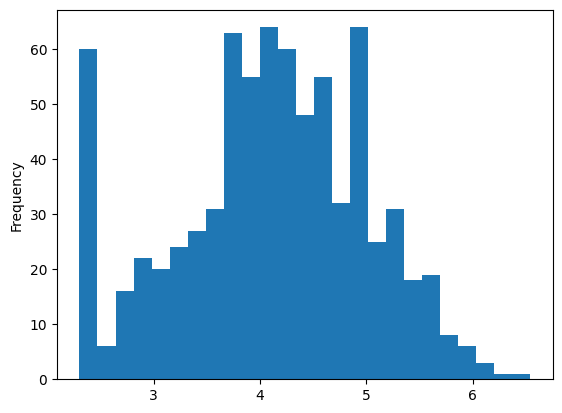

In [48]:
df['spvl'].plot.hist(bins=25)

In [57]:
df[(df['spvl'] < 2.302) & (df['n.vl'] == 1)]['n.vl']

Couple
16      1
76      1
356     1
414     1
676     1
695     1
914     1
1244    1
1250    1
1255    1
1257    1
1389    1
1655    1
1827    1
1932    1
2061    1
2099    1
2167    1
2312    1
2364    1
2460    1
2481    1
2504    1
2707    1
2720    1
2738    1
2783    1
3073    1
3075    1
Name: n.vl, dtype: int64

In [58]:
df['n.vl'].mean()

2.8590250329380766